<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/ReminderPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
Tensor = torch.tensor([  [[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]],
                       [[10, 11, 12],
                        [13, 14, 15],
                        [16, 17, 18]] ])

In [ ]:
Tensor.size()

torch.Size([2, 3, 3])

In [ ]:
Tensor[1, :, :]

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [ ]:
torch.rand(size=(3,4))

tensor([[0.6472, 0.8152, 0.9340, 0.9325],
        [0.3353, 0.0624, 0.5703, 0.1481],
        [0.4355, 0.6052, 0.6754, 0.3076]])

### putting Everything together

In [1]:
import torch 
import matplotlib.pyplot as plt
from torch import nn

In [2]:
weight = 0.7 
bias = 0.3

start = 0 
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.shape)

y = weight * X + bias
X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
from torch.storage import T
train_split = int( 0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [4]:
 # creat model
class linearRegModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x):
    return self.linear_layer(x)



In [14]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

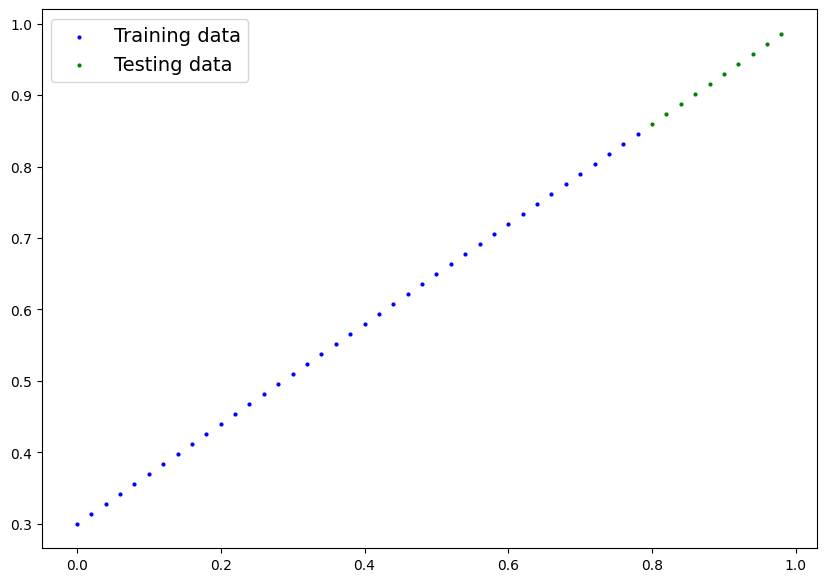

In [15]:
plot_predictions()

In [5]:
torch.manual_seed(42)
model_1 = linearRegModel()
model_1, model_1.state_dict()

(linearRegModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
next(model_1.parameters()).device

device(type='cpu')

In [10]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training code 

In [13]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [18]:
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test   = X_test.to(device) , y_test.to(device)

In [20]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing 

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 ==0 :
      print( f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")

Epoch: 0 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 10 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 20 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 30 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 40 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 50 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 60 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 70 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 80 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 90 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 100 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 110 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 120 | Loss: 0.010256484150886536 | Test_loss: 0.0003308236482553184
Epoch: 130 | Loss: 0.010256484150886

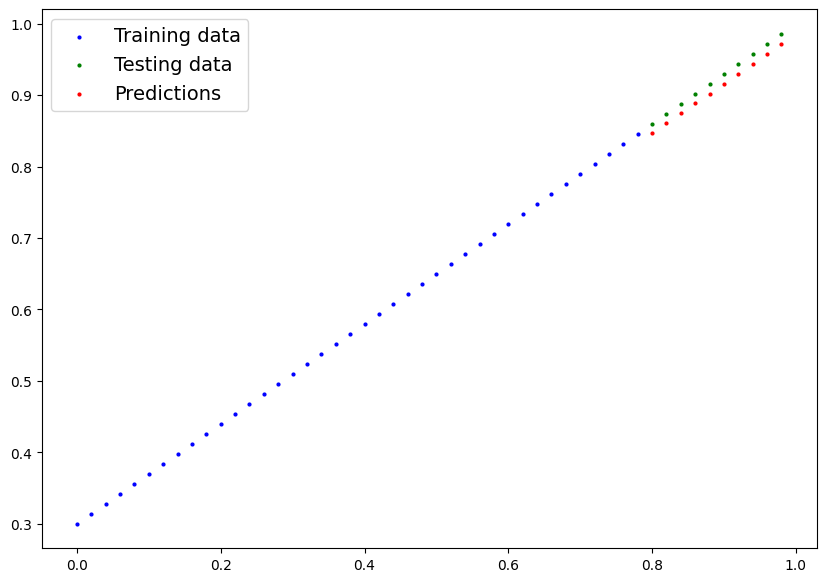

In [24]:
plot_predictions(predictions=test_pred.cpu())

In [22]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [23]:
weight, bias

(0.7, 0.3)

In [26]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [27]:
loaded_model_1 = linearRegModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.state_dict()
loaded_model_1.to(device)

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [28]:
loaded_model_1.eval()
with torch.inference_mode():
  y_pred_loaded =loaded_model_1(X_test)

print(y_pred_loaded == test_pred) 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


### Neural Network

In [29]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

In [30]:

# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


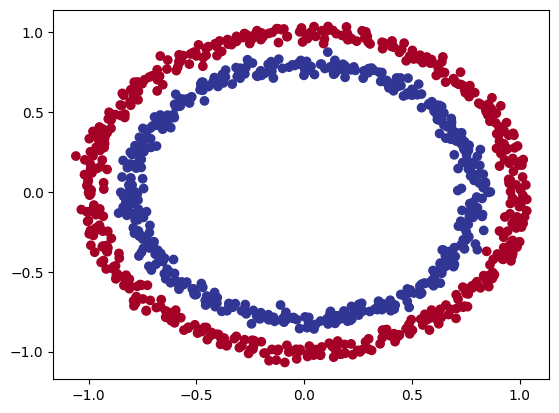

In [31]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);